In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles

In [2]:
autisms = pd.read_csv('processed_data/autism_terms.csv', sep='\t')
genes = pd.read_csv("../raw_data/gene_associations.tsv", sep='\t')
data = pd.read_csv("./processed_data/curated_gene_disease_associations_autism_grouped.csv", sep='\t')

##### Create lof_tolerance for genes

- https://genome.ucsc.edu/cgi-bin/hgTrackUi?db=hg19&g=gnomadPLI
- https://www.disgenet.org/dbinfo

In [3]:
genes['lof_tolerance'] = genes['PLI'].apply(
    lambda x: 'Extreme Intolerant' if x >= 0.9 else 
    ('Intolerant' if x <= 0.1 else 'Tolerant')
)

In [4]:
genes.head(2)

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance
0,1,A1BG,0.700,0.538,4.991700e-09,Receptor,DTO_05007575,27,20,Intolerant
1,2,A2M,0.529,0.769,4.522900e-11,Enzyme modulator,DTO_05007584,147,145,Intolerant


### Create df for genes in each autism subtype

In [5]:
autism_subtypes = data.loc[data['autism_subtype_broad']!="Not Autism", ['diseaseId', 'diseaseName']].drop_duplicates()
autism_subtypes.head()

,diseaseId,diseaseName
100,A00,Autism Spectrum Disorder
1952,A09,Hamartoma tumor Syndrome
3422,A02,Fragile X Syndrome
4018,A16,Digeorge Syndrome
6110,A08,Neurofibromatosis


In [6]:
autism_subtype_genes = {}

for i, row in autism_subtypes.iterrows():
    subtype_name = row['diseaseName']
    subtype_gene_ids = data[data['diseaseName'] == subtype_name]['geneId'].unique()
    autism_subtype_genes[subtype_name] = genes[genes['geneId'].isin(subtype_gene_ids)]

In [7]:
autism_subtype_genes['Autism Spectrum Disorder']

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance
11,18,ABAT,0.628,0.538,6.321600e-03,Enzyme,DTO_05007624,127,49,Intolerant
29,36,ACADSB,0.691,0.500,2.656500e-11,NaN,NaN,32,13,Intolerant
33,40,ASIC2,0.653,0.538,9.991200e-01,Ion channel,DTO_01300327,50,39,Extreme Intolerant
66,100,ADA,0.440,0.885,2.882500e-12,Enzyme,DTO_05007624,379,560,Intolerant
95,133,ADM,0.436,0.808,4.083100e-02,Signaling,DTO_05007599,405,420,Intolerant
...,...,...,...,...,...,...,...,...,...,...
16868,285195,SLC9A9,0.656,0.577,5.331100e-12,Transporter,DTO_05007405,44,28,Intolerant
17299,347731,LRRTM3,0.805,0.154,9.751900e-01,NaN,NaN,7,9,Extreme Intolerant
17961,406900,MIR106B,0.523,0.808,NaN,NaN,NaN,143,155,Tolerant
18068,407010,MIR23A,0.499,0.808,NaN,NaN,NaN,174,173,Tolerant


### Create df for genes in all autism

In [8]:
autism_genes = pd.concat(autism_subtype_genes.values(), axis=0, ignore_index=True)
autism_genes = autism_genes.drop_duplicates()
autism_genes.head()

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance
0,18,ABAT,0.628,0.538,6.321600e-03,Enzyme,DTO_05007624,127,49,Intolerant
1,36,ACADSB,0.691,0.500,2.656500e-11,NaN,NaN,32,13,Intolerant
2,40,ASIC2,0.653,0.538,9.991200e-01,Ion channel,DTO_01300327,50,39,Extreme Intolerant
3,100,ADA,0.440,0.885,2.882500e-12,Enzyme,DTO_05007624,379,560,Intolerant
4,133,ADM,0.436,0.808,4.083100e-02,Signaling,DTO_05007599,405,420,Intolerant


### Create df for genes for polygenic autism and syndromic autism

In [9]:
data['autism_subtype_broad'].unique()

array(['Not Autism', 'Non-Syndromic Autism', 'Syndromic Autism'],
      dtype=object)

In [10]:
autism_polygenic_gene_ids = data[data['autism_subtype_broad'] == 'Non-Syndromic Autism']['geneId'].unique()
autism_syndromic_genes_ids = data[data['autism_subtype_broad'] == 'Syndromic Autism']['geneId'].unique()

In [11]:
autism_polygenic_genes = autism_genes[autism_genes['geneId'].isin(autism_polygenic_gene_ids)]
autism_syndromic_genes = autism_genes[autism_genes['geneId'].isin(autism_syndromic_genes_ids)]

In [12]:
autism_polygenic_genes.head()

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance
0,18,ABAT,0.628,0.538,6.321600e-03,Enzyme,DTO_05007624,127,49,Intolerant
1,36,ACADSB,0.691,0.500,2.656500e-11,NaN,NaN,32,13,Intolerant
2,40,ASIC2,0.653,0.538,9.991200e-01,Ion channel,DTO_01300327,50,39,Extreme Intolerant
3,100,ADA,0.440,0.885,2.882500e-12,Enzyme,DTO_05007624,379,560,Intolerant
4,133,ADM,0.436,0.808,4.083100e-02,Signaling,DTO_05007599,405,420,Intolerant


# Look into the properties all genes associated with autism

## Create dataframes for visualization

### df for broad subtypes

In [13]:
autism_genes['Autism Subtypes'] = np.repeat("All Subtypes", len(autism_genes))
autism_polygenic_genes['Autism Subtypes'] = np.repeat("Non-Syndromic", len(autism_polygenic_genes))
autism_syndromic_genes['Autism Subtypes'] = np.repeat("Syndromic", len(autism_syndromic_genes))

autism_df_plot = pd.concat([autism_genes, autism_polygenic_genes, autism_syndromic_genes], axis=0, ignore_index=True)

/var/folders/7n/c_p139yj6jq0tctqpx0x_2rr0000gn/T/ipykernel_2074/4042127199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autism_polygenic_genes['Autism Subtypes'] = np.repeat("Non-Syndromic", len(autism_polygenic_genes))
/var/folders/7n/c_p139yj6jq0tctqpx0x_2rr0000gn/T/ipykernel_2074/4042127199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autism_syndromic_genes['Autism Subtypes'] = np.repeat("Syndromic", len(autism_syndromic_genes))


In [14]:
autism_df_plot.head(2)

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance,Autism Subtypes
0,18,ABAT,0.628,0.538,6.321600e-03,Enzyme,DTO_05007624,127,49,Intolerant,All Subtypes
1,36,ACADSB,0.691,0.500,2.656500e-11,NaN,NaN,32,13,Intolerant,All Subtypes


### df for specific subtype

In [15]:
for key, df in autism_subtype_genes.items():
    df['Autism Subtypes'] = np.repeat(key, len(df))

autism_df_plot_2 = pd.concat(autism_subtype_genes.values(), axis=0, ignore_index=True)
autism_df_plot_2 = autism_df_plot_2.sort_values('Autism Subtypes', ascending=True)
autism_df_plot_2.head()

/var/folders/7n/c_p139yj6jq0tctqpx0x_2rr0000gn/T/ipykernel_2074/2256063567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Autism Subtypes'] = np.repeat(key, len(df))
/var/folders/7n/c_p139yj6jq0tctqpx0x_2rr0000gn/T/ipykernel_2074/2256063567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Autism Subtypes'] = np.repeat(key, len(df))
/var/folders/7n/c_p139yj6jq0tctqpx0x_2rr0000gn/T/ipykernel_2074/2256063567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance,Autism Subtypes
435,7337,UBE3A,0.561,0.692,0.999800,NaN,NaN,155,270,Extreme Intolerant,Angelman Syndrome
434,6792,CDKL5,0.522,0.692,0.999320,Kinase,DTO_03300101,224,243,Extreme Intolerant,Angelman Syndrome
433,2562,GABRB3,0.546,0.615,0.951380,Ion channel,DTO_01300327,139,118,Extreme Intolerant,Angelman Syndrome
0,18,ABAT,0.628,0.538,0.006322,Enzyme,DTO_05007624,127,49,Intolerant,Autism Spectrum Disorder
199,9228,DLGAP2,0.736,0.385,0.999890,Receptor,DTO_05007575,22,18,Extreme Intolerant,Autism Spectrum Disorder


In [16]:
polygenic = ['Autism Spectrum Disorder']
autism_df_plot_2.loc[autism_df_plot_2['Autism Subtypes'].isin(polygenic), 'Syndromic vs Non-Syndromic'] = 'Non-Syndromic Autism'
autism_df_plot_2.loc[~autism_df_plot_2['Autism Subtypes'].isin(polygenic), 'Syndromic vs Non-Syndromic'] = 'Syndromic Autism'

In [17]:
autism_df_plot_2_1 = autism_df_plot_2.loc[autism_df_plot_2['Autism Subtypes'].isin(polygenic), ]
autism_df_plot_2_1.tail(2)

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance,Autism Subtypes,Syndromic vs Non-Syndromic
110,4129,MAOB,0.533,0.808,0.999030,NaN,NaN,152,290,Extreme Intolerant,Autism Spectrum Disorder,Non-Syndromic Autism
147,5551,PRF1,0.540,0.692,0.000005,NaN,NaN,163,162,Intolerant,Autism Spectrum Disorder,Non-Syndromic Autism


In [18]:
autism_df_plot_2_2 = autism_df_plot_2.loc[~autism_df_plot_2['Autism Subtypes'].isin(polygenic), ]
autism_df_plot_2_2.head(2)

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance,Autism Subtypes,Syndromic vs Non-Syndromic
435,7337,UBE3A,0.561,0.692,0.99980,NaN,NaN,155,270,Extreme Intolerant,Angelman Syndrome,Syndromic Autism
434,6792,CDKL5,0.522,0.692,0.99932,Kinase,DTO_03300101,224,243,Extreme Intolerant,Angelman Syndrome,Syndromic Autism


In [19]:
autism_df_plot_2 = pd.concat([autism_df_plot_2_1, autism_df_plot_2_2], axis=0)

In [20]:
autism_df_plot_2.loc[autism_df_plot_2['Autism Subtypes'] == "Autism Spectrum Disorder", 'Autism Subtypes'] = "Non-Syndromic Autism"

In [21]:
autism_df_plot_2.head(2)

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance,Autism Subtypes,Syndromic vs Non-Syndromic
0,18,ABAT,0.628,0.538,0.006322,Enzyme,DTO_05007624,127,49,Intolerant,Non-Syndromic Autism,Non-Syndromic Autism
199,9228,DLGAP2,0.736,0.385,0.999890,Receptor,DTO_05007575,22,18,Extreme Intolerant,Non-Syndromic Autism,Non-Syndromic Autism


In [22]:
autism_df_plot_2.tail(2)

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance,Autism Subtypes,Syndromic vs Non-Syndromic
416,2969,GTF2I,0.500,0.808,9.959200e-01,NaN,NaN,249,80,Extreme Intolerant,William Syndrome,Syndromic Autism
415,2006,ELN,0.415,0.885,2.142900e-14,NaN,NaN,545,595,Intolerant,William Syndrome,Syndromic Autism


## Genes Count

In [23]:
gene_counts = {}
gene_counts['All Subtypes'] = len(autism_genes['geneId'].unique())
gene_counts['Polygenic'] = len(autism_polygenic_genes['geneId'].unique())
gene_counts['Syndromic'] = len(autism_syndromic_genes['geneId'].unique())
gene_counts['Overlap'] = autism_syndromic_genes['geneId'].isin(autism_polygenic_genes['geneId']).sum()

In [24]:
gene_counts

{'All Subtypes': 420, 'Polygenic': 292, 'Syndromic': 152, 'Overlap': 24}

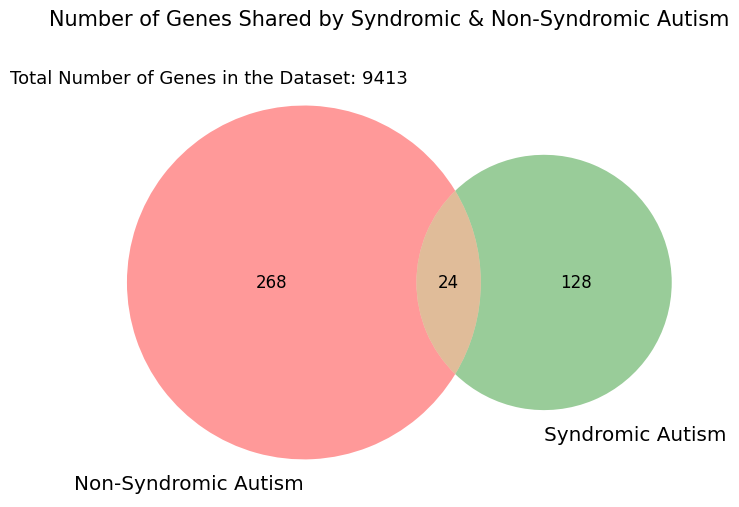

In [53]:
fig, ax = plt.subplots(figsize=[8, 6])


venn2(
    [set(autism_polygenic_genes['geneId']), set(autism_syndromic_genes['geneId'])],
    set_labels = ('Non-Syndromic Autism', 'Syndromic Autism'),
    ax = ax
    )

plt.suptitle("Number of Genes Shared by Syndromic & Non-Syndromic Autism", x=0.5, y=0.95, fontsize=15)

ax.text(x=-1, y=0.53, s=f"Total Number of Genes in the Dataset: {len(data['geneId'].unique())}", fontsize=13)


plt.savefig("../figures/gene_properties/venn.png")
plt.show()


In [26]:
# Calculate the percentage of different levels of lof_tolerance within each autism subtype
perc = autism_df_plot.groupby('Autism Subtypes')['lof_tolerance'].value_counts(normalize=True)
perc *= 100
perc_df = pd.DataFrame(perc).reset_index()

perc_df = perc_df.pivot(index='Autism Subtypes', columns='lof_tolerance', values='proportion')
perc_df = perc_df.reset_index()
perc_df = perc_df.sort_values('Autism Subtypes', ascending=False)

In [27]:
subtye_gene_counts = []
for key, df in autism_subtype_genes.items():
    subtye_gene_counts.append({
        'Autism Subtypes': key,
        'Number of Genes' : len(df['geneId'].unique())
    })
subtye_gene_counts_df = pd.DataFrame(subtye_gene_counts)
subtye_gene_counts_df = subtye_gene_counts_df.sort_values("Number of Genes", ascending=False)

In [28]:
subtye_gene_counts_df.iloc[1:, 1].sum()

163

In [29]:
subtye_gene_counts_df.iloc[0, 0] = 'Non-Syndromatic Autism'

In [30]:
subtye_gene_counts_df.iloc[1:, 1]

5     35
4     32
7     23
3     18
9     10
1      9
10     9
14     8
12     4
2      3
11     3
15     2
16     2
17     2
6      1
8      1
13     1
Name: Number of Genes, dtype: int64

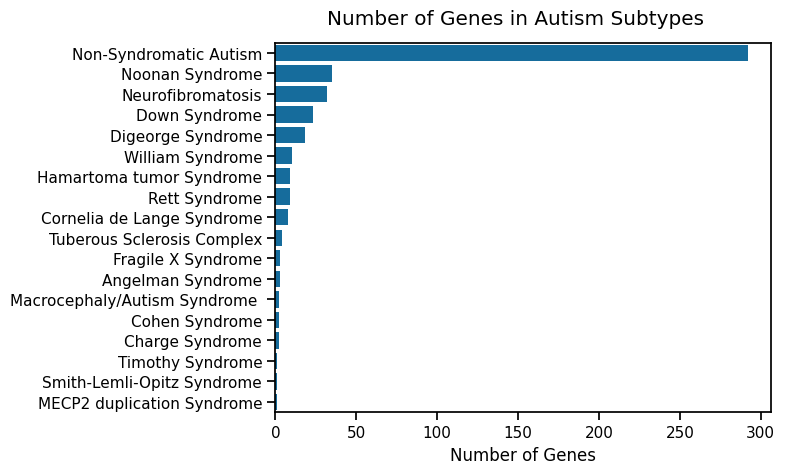

In [31]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')

# Create a bar plot
g = sns.barplot(data=subtye_gene_counts_df, x='Number of Genes', y='Autism Subtypes')


plt.suptitle("Number of Genes in Autism Subtypes", x=0.5, y=0.95)
g.set(xlabel="Number of Genes", ylabel="")
# Show the plot
plt.savefig("../figures/gene_properties/number_of_autism_genes", bbox_inches='tight')
plt.show()

## DSI

In [32]:
autism_df_plot["Autism Subtypes"].unique()

array(['All Subtypes', 'Non-Syndromic', 'Syndromic'], dtype=object)

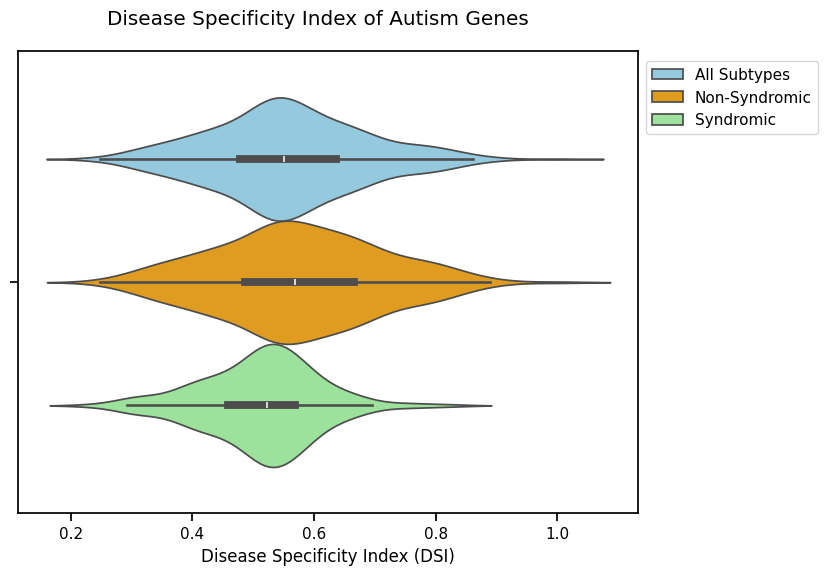

In [33]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')
plt.figure(figsize=(8, 6))

g = sns.violinplot(data=autism_df_plot, x="DSI", hue="Autism Subtypes", palette=['skyblue', 'orange', 'lightgreen'])
g.legend(loc='center left', bbox_to_anchor=(1, 0.9), ncol=1)
g.set(xlabel="Disease Specificity Index (DSI)")
plt.suptitle("Disease Specificity Index of Autism Genes", x=0.5, y=0.95)

# plt.savefig("../figures/gene_properties/DSI_violin_autism_genes", bbox_inches='tight')
plt.show()

In [34]:
autism_df_plot_2.head()

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance,Autism Subtypes,Syndromic vs Non-Syndromic
0,18,ABAT,0.628,0.538,0.006322,Enzyme,DTO_05007624,127,49,Intolerant,Non-Syndromic Autism,Non-Syndromic Autism
199,9228,DLGAP2,0.736,0.385,0.999890,Receptor,DTO_05007575,22,18,Extreme Intolerant,Non-Syndromic Autism,Non-Syndromic Autism
198,9147,NEMF,0.805,0.154,0.000358,NaN,NaN,8,5,Intolerant,Non-Syndromic Autism,Non-Syndromic Autism
197,9037,SEMA5A,0.610,0.731,0.000015,NaN,NaN,85,45,Intolerant,Non-Syndromic Autism,Non-Syndromic Autism
196,9025,RNF8,0.695,0.462,0.999430,NaN,NaN,27,24,Extreme Intolerant,Non-Syndromic Autism,Non-Syndromic Autism


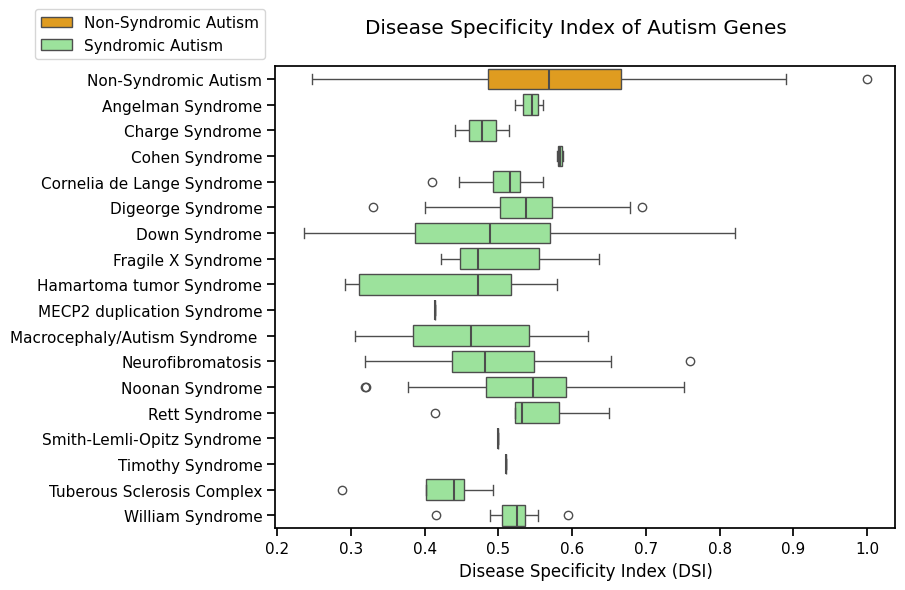

In [35]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')
plt.figure(figsize=(8, 6))

g = sns.boxplot(
    data=autism_df_plot_2, x="DSI", 
    y="Autism Subtypes", 
    hue="Syndromic vs Non-Syndromic", 
    palette=['orange', 'lightgreen'],
    medianprops={"linewidth": 1.5})
# g.legend(loc='center left', bbox_to_anchor=(-0.3, 1.1), ncol=1)
plt.suptitle("Disease Specificity Index of Autism Genes", x=0.5, y=0.96)
plt.legend(loc='upper left', bbox_to_anchor=[-0.4, 1.14])
g.set(xlabel="Disease Specificity Index (DSI)", ylabel="")

plt.savefig("../figures/gene_properties/DSI_box_autism_genes", bbox_inches='tight')
plt.show()

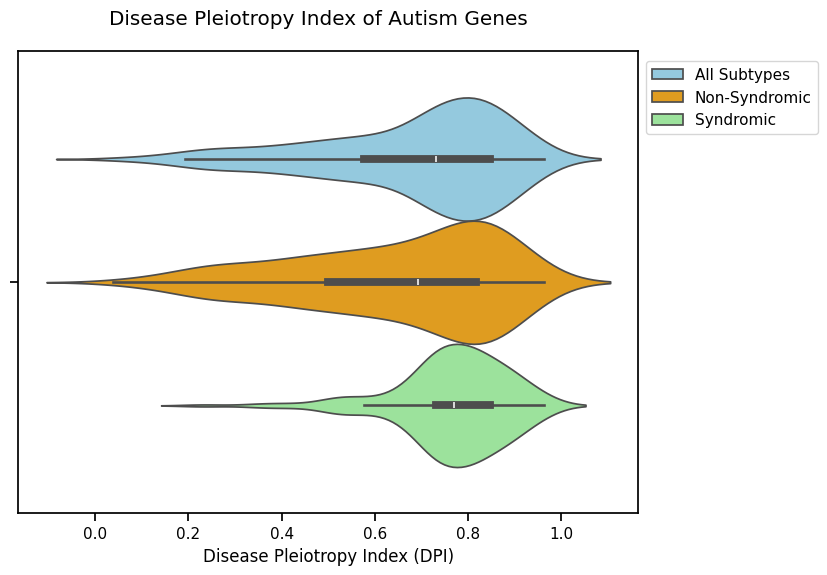

In [36]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')
plt.figure(figsize=(8, 6))

g = sns.violinplot(data=autism_df_plot, x="DPI", hue="Autism Subtypes", palette=['skyblue', 'orange', 'lightgreen'])
g.legend(loc='center left', bbox_to_anchor=(1, 0.9), ncol=1)
g.set(xlabel="Disease Pleiotropy Index (DPI)")
plt.suptitle("Disease Pleiotropy Index of Autism Genes", x=0.5, y=0.95)

# plt.savefig("../figures/gene_properties/DPI_violin_autism_genes", bbox_inches='tight')
plt.show()

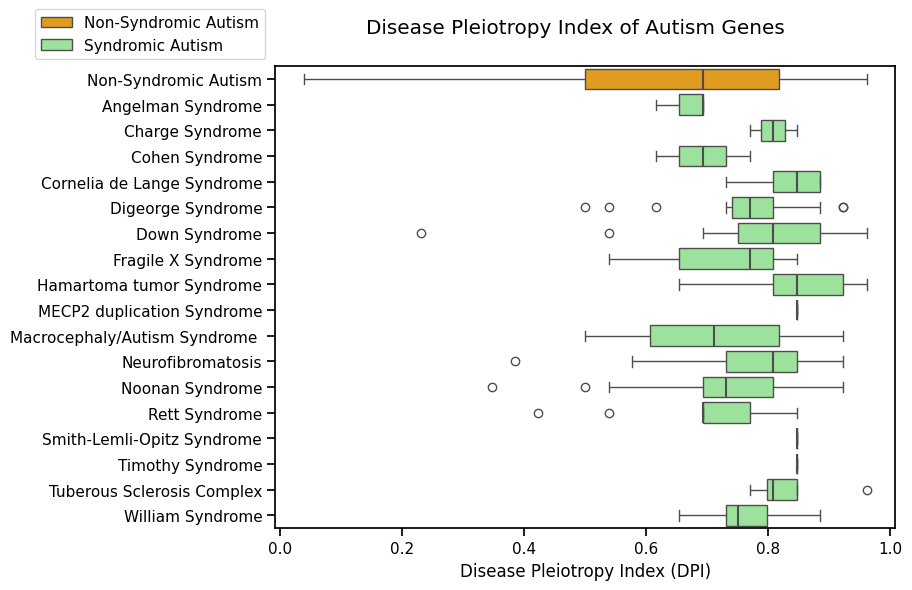

In [37]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')
plt.figure(figsize=(8, 6))

g = sns.boxplot(
    data=autism_df_plot_2, 
    x="DPI", 
    y="Autism Subtypes", 
    hue="Syndromic vs Non-Syndromic", 
    palette=['orange', 'lightgreen'],
    medianprops={"linewidth": 1.5})
# g.legend(loc='center left', bbox_to_anchor=(-0.3, 1.1), ncol=1)
plt.suptitle("Disease Pleiotropy Index of Autism Genes", x=0.5, y=0.96)
plt.legend(loc='upper left', bbox_to_anchor=[-0.4, 1.14])
g.set(xlabel="Disease Pleiotropy Index (DPI)", ylabel="")

plt.savefig("../figures/gene_properties/DPI_box_autism_genes", bbox_inches='tight')
plt.show()

## Loss of function

In [38]:
# Calculate the percentage of different levels of lof_tolerance within each autism subtype
perc = autism_df_plot.groupby('Autism Subtypes')['lof_tolerance'].value_counts(normalize=True)
perc *= 100
perc_df = pd.DataFrame(perc).reset_index()

perc_df = perc_df.pivot(index='Autism Subtypes', columns='lof_tolerance', values='proportion')
perc_df = perc_df.reset_index()
perc_df = perc_df.sort_values('Autism Subtypes', ascending=False)

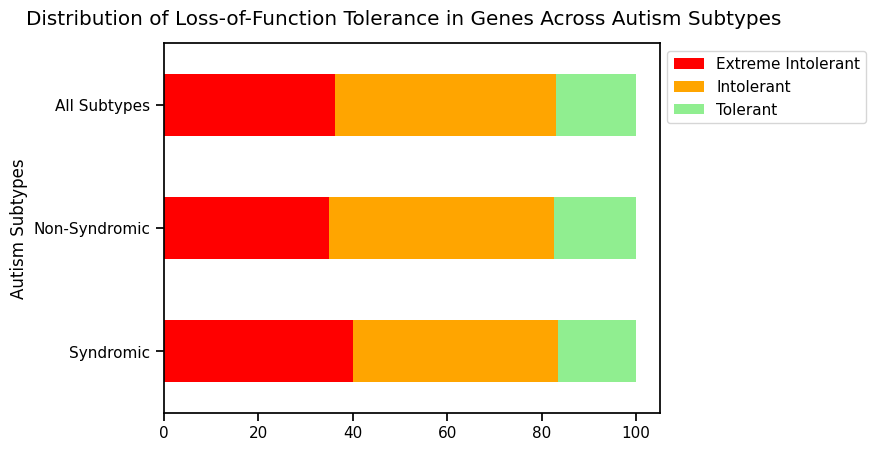

In [39]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')

# Create a bar plot
perc_df.plot( 
    x = 'Autism Subtypes', 
    kind = 'barh', 
    stacked = True,
    mark_right = True,
    color=['red', 'orange', 'lightgreen'])


plt.suptitle("Distribution of Loss-of-Function Tolerance in Genes Across Autism Subtypes", x=0.5, y=0.95)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Show the plot
# plt.savefig("../figures/gene_properties/lof_bar_autism_genes_overall", bbox_inches='tight')
plt.show()

### For each subgroups

In [40]:
# Calculate the percentage of different levels of lof_tolerance within each autism subtype
perc = autism_df_plot_2.groupby('Autism Subtypes')['lof_tolerance'].value_counts(normalize=True)
perc *= 100
perc_df = pd.DataFrame(perc).reset_index()

perc_df = perc_df.pivot(index='Autism Subtypes', columns='lof_tolerance', values='proportion')
perc_df = perc_df.reset_index()
perc_df = perc_df.fillna(0)
perc_df = perc_df.sort_values('Autism Subtypes', ascending=False)

In [41]:
# Reorder the df
autism_syndromic_names = autisms[autisms['autism_subtype_broad']=='Syndromic Autism']['autism_subtype'].unique()

perc_df_poly = perc_df.loc[perc_df['Autism Subtypes'] == 'Non-Syndromic Autism', ]
perc_df_syndro = perc_df[perc_df['Autism Subtypes'].isin(autism_syndromic_names)]

perc_df_ordered = pd.concat([perc_df_syndro, perc_df_poly], axis=0, ignore_index=True)
perc_df_ordered

lof_tolerance,Autism Subtypes,Extreme Intolerant,Intolerant,Tolerant
0,William Syndrome,60.000000,40.000000,0.000000
1,Tuberous Sclerosis Complex,75.000000,0.000000,25.000000
2,Timothy Syndrome,100.000000,0.000000,0.000000
3,Smith-Lemli-Opitz Syndrome,0.000000,100.000000,0.000000
4,Rett Syndrome,55.555556,11.111111,33.333333
5,Noonan Syndrome,28.571429,60.000000,11.428571
6,Neurofibromatosis,25.000000,56.250000,18.750000
7,Macrocephaly/Autism Syndrome,0.000000,0.000000,100.000000
8,MECP2 duplication Syndrome,0.000000,0.000000,100.000000
9,Hamartoma tumor Syndrome,33.333333,44.444444,22.222222


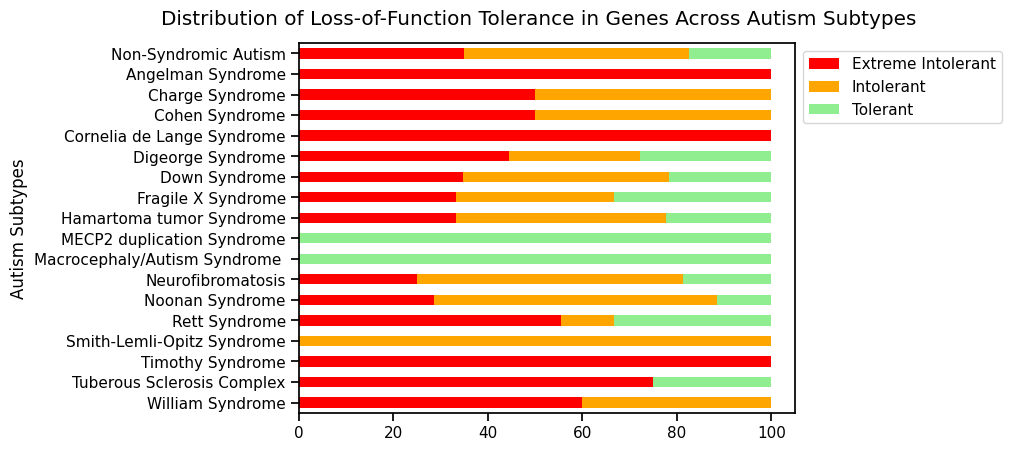

In [42]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')

# Create a bar plot
perc_df_ordered.plot( 
    x = 'Autism Subtypes', 
    kind = 'barh', 
    stacked = True,
    mark_right = True,
    color=['red', 'orange', 'lightgreen'])


plt.suptitle("Distribution of Loss-of-Function Tolerance in Genes Across Autism Subtypes", x=0.5, y=0.95)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Show the plot
plt.savefig("../figures/gene_properties/lof_bar_autism_genes_specific", bbox_inches='tight')
plt.show()

# Compare with All genes

In [43]:
genes_df = genes[genes['geneId'].isin(data['geneId'])].drop_duplicates()
genes_df['Diseases'] = 'All Diseases'
genes_df.head()

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance,Diseases
0,1,A1BG,0.700,0.538,4.991700e-09,Receptor,DTO_05007575,27,20,Intolerant,All Diseases
1,2,A2M,0.529,0.769,4.522900e-11,Enzyme modulator,DTO_05007584,147,145,Intolerant,All Diseases
3,9,NAT1,0.536,0.846,1.929400e-14,Enzyme,DTO_05007624,133,184,Intolerant,All Diseases
4,10,NAT2,0.451,0.885,3.274400e-06,Enzyme,DTO_05007624,311,627,Intolerant,All Diseases
5,12,SERPINA3,0.486,0.846,8.833000e-14,Enzyme modulator,DTO_05007584,229,300,Intolerant,All Diseases


In [44]:
autism_df_plot.head()

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance,Autism Subtypes
0,18,ABAT,0.628,0.538,6.321600e-03,Enzyme,DTO_05007624,127,49,Intolerant,All Subtypes
1,36,ACADSB,0.691,0.500,2.656500e-11,NaN,NaN,32,13,Intolerant,All Subtypes
2,40,ASIC2,0.653,0.538,9.991200e-01,Ion channel,DTO_01300327,50,39,Extreme Intolerant,All Subtypes
3,100,ADA,0.440,0.885,2.882500e-12,Enzyme,DTO_05007624,379,560,Intolerant,All Subtypes
4,133,ADM,0.436,0.808,4.083100e-02,Signaling,DTO_05007599,405,420,Intolerant,All Subtypes


In [45]:
autism_df_plot['Autism Subtypes'].unique()

array(['All Subtypes', 'Non-Syndromic', 'Syndromic'], dtype=object)

In [46]:
df_temp = autism_df_plot[autism_df_plot['Autism Subtypes'] != 'All Subtypes']
df_temp = df_temp.rename(columns={"Autism Subtypes": 'Diseases'})
df_temp['Diseases'] += ' Autism'
df_temp.head()

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance,Diseases
420,18,ABAT,0.628,0.538,6.321600e-03,Enzyme,DTO_05007624,127,49,Intolerant,Non-Syndromic Autism
421,36,ACADSB,0.691,0.500,2.656500e-11,NaN,NaN,32,13,Intolerant,Non-Syndromic Autism
422,40,ASIC2,0.653,0.538,9.991200e-01,Ion channel,DTO_01300327,50,39,Extreme Intolerant,Non-Syndromic Autism
423,100,ADA,0.440,0.885,2.882500e-12,Enzyme,DTO_05007624,379,560,Intolerant,Non-Syndromic Autism
424,133,ADM,0.436,0.808,4.083100e-02,Signaling,DTO_05007599,405,420,Intolerant,Non-Syndromic Autism


In [47]:
genes_df = pd.concat(
    [genes_df, df_temp], 
    axis=0,
    ignore_index=True)

genes_df.head()

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,lof_tolerance,Diseases
0,1,A1BG,0.700,0.538,4.991700e-09,Receptor,DTO_05007575,27,20,Intolerant,All Diseases
1,2,A2M,0.529,0.769,4.522900e-11,Enzyme modulator,DTO_05007584,147,145,Intolerant,All Diseases
2,9,NAT1,0.536,0.846,1.929400e-14,Enzyme,DTO_05007624,133,184,Intolerant,All Diseases
3,10,NAT2,0.451,0.885,3.274400e-06,Enzyme,DTO_05007624,311,627,Intolerant,All Diseases
4,12,SERPINA3,0.486,0.846,8.833000e-14,Enzyme modulator,DTO_05007584,229,300,Intolerant,All Diseases


In [48]:
genes_df['Diseases'].unique()

array(['All Diseases', 'Non-Syndromic Autism', 'Syndromic Autism'],
      dtype=object)

### DSI

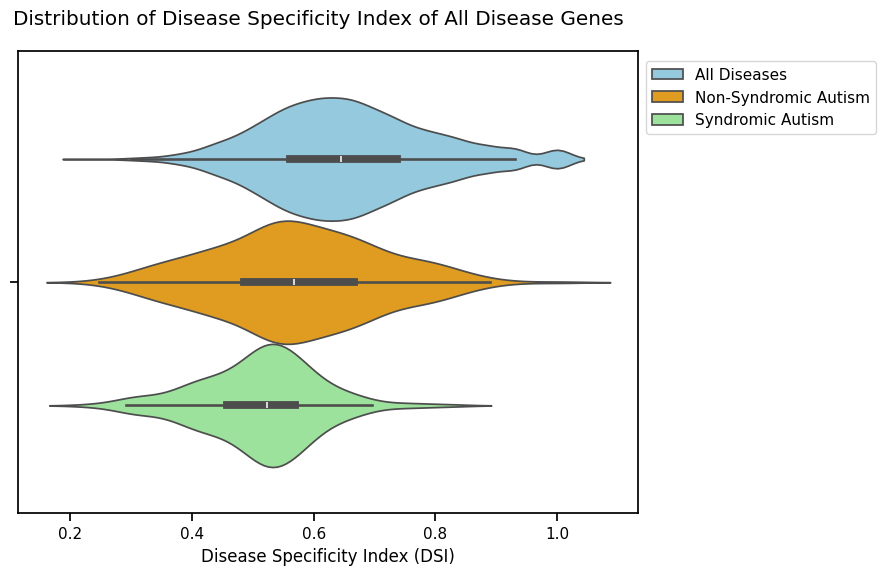

In [49]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')
plt.figure(figsize=(8, 6))

g = sns.violinplot(data=genes_df, x="DSI", hue="Diseases", palette=['skyblue', 'orange', 'lightgreen'])
g.legend(loc='center left', bbox_to_anchor=(1, 0.9), ncol=1)
g.set(xlabel="Disease Specificity Index (DSI)")
plt.suptitle("Distribution of Disease Specificity Index of All Disease Genes", x=0.5, y=0.95)

plt.savefig("../figures/gene_properties/DSI_violin_all_genes", bbox_inches='tight')
plt.show()

## DPI

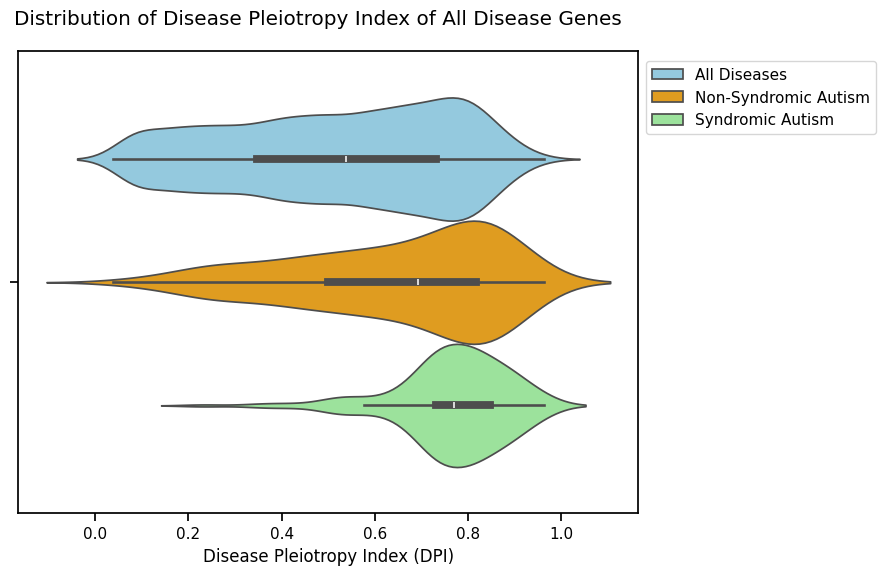

In [50]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')
plt.figure(figsize=(8, 6))

g = sns.violinplot(data=genes_df, x="DPI", hue="Diseases", palette=['skyblue', 'orange', 'lightgreen'])
g.legend(loc='center left', bbox_to_anchor=(1, 0.9), ncol=1)
g.set(xlabel="Disease Pleiotropy Index (DPI)")
plt.suptitle("Distribution of Disease Pleiotropy Index of All Disease Genes", x=0.5, y=0.95)

plt.savefig("../figures/gene_properties/DPI_violin_all_genes", bbox_inches='tight')
plt.show()

### Loss of function

In [51]:
# Calculate the percentage of different levels of lof_tolerance within each autism subtype
perc = genes_df.groupby('Diseases')['lof_tolerance'].value_counts(normalize=True)
perc *= 100
perc_df = pd.DataFrame(perc).reset_index()

perc_df = perc_df.pivot(index='Diseases', columns='lof_tolerance', values='proportion')
perc_df = perc_df.reset_index()
perc_df = perc_df.sort_values('Diseases', ascending=False)

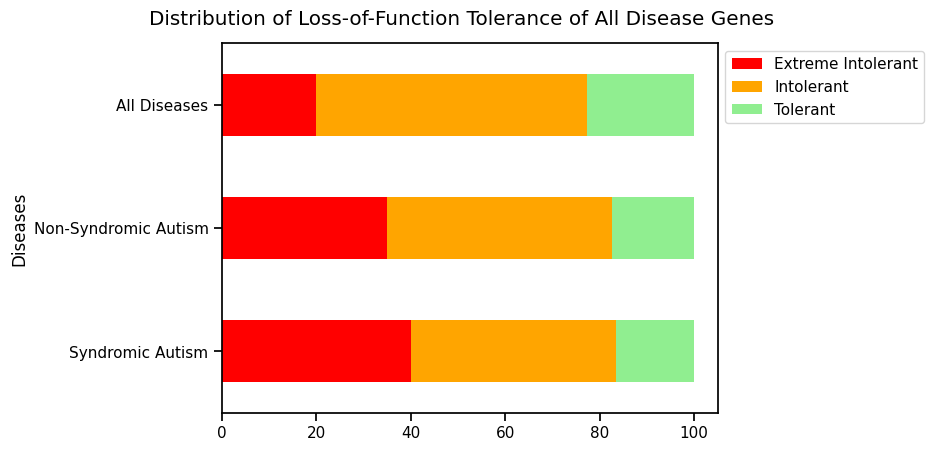

In [52]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')

# Create a bar plot
perc_df.plot( 
    x = 'Diseases', 
    kind = 'barh', 
    stacked = True,
    mark_right = True,
    color=['red', 'orange', 'lightgreen'])


plt.suptitle("Distribution of Loss-of-Function Tolerance of All Disease Genes", x=0.5, y=0.95)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

plt.savefig("../figures/gene_properties/lof_bar_all_genes", bbox_inches='tight')
# Show the plot
plt.show()